# EDA dan Klasifikasi

Disusun untuk memenuhi tugas Data Mining dan Warehouse
Dosen pengampu: Dr. Yudi Wibisono, S.T., M.T.

Kelompok 4
1. Natasha Adinda Cantika (2312120)
2. Futih Millati Addinillah (2309445)
3. Muhammad Ruby Pradana Syamsun (2304191)
4. Armelia Zahrah Mumtaz (2300801)
5. Syahraini Revita Puri (2301895)

## A. Pendahuluan

Klasifikasi adalah salah satu teknik dalam machine learning yang bertujuan untuk memprediksi label atau kategori dari data berdasarkan fitur-fitur yang dimiliki. Misalnya, pada industri e-commerce, perusahaan dapat menggunakan model klasifikasi untuk memprediksi apakah seorang pelanggan akan melakukan pembelian berdasarkan riwayat perilaku mereka di situs web. Dengan kemampuan ini, perusahaan dapat mengoptimalkan strategi pemasaran, meningkatkan konversi, dan memaksimalkan keuntungan.

Pada tugas ini, kami berfokus pada penggunaan model klasifikasi untuk memprediksi apakah suatu sesi interaksi dengan platform tertentu akan menghasilkan pesanan atau tidak. Dengan menganalisis beberapa atribut yang dapat digunakan dalam membuat model klasifikasi. Permasalahan utama dalam tugas ini adalah untuk membangun model prediksi yang paling akurat untuk mengidentifikasi peluang pembeli melakukan order atau tidak.

Sebelum melakukan pembuatan model, tentu saja kita tidak boleh melewati langkah krusial pertama untuk efisiensi yaitu, preprocessing. Kami menerapkan beberapa metode machine learning, seperti Random Forest dengan bantuan library Scikit Learn. Setelah pembuatan model selesai, tentunya setiap model akan melalui evaluasi berdsarkan hasil prediksi masing masing model dengan metrik penilaian seperti confusion matrix, classification report, dan accuracy score guna memastikan bahwa model yang dihasilkan mampu melakukan prediksi dengan tingkat akurasi yang tinggi.

Dengan menggunakan pendekatan machine learning yang tepat, tugas klasifikasi ini tidak hanya diharapkan dapat memberikan wawasan yang lebih mendalam tentang prediksi terkait keputusan order barang oleh pembeli melalui interaksi pembeli pada platform online shopping. Oleh karena itu, keberhasilan dalam penyusunan tugas ini dapat memberikan pengetahuan baru kepada penyusun laporan ini.

## B. Pembahasan

Langkah awal sebelum melakukan pembuatan model yaitu melakukan preprocessing terlebih dahulu. Langkah langkah yang dilakukan dalam preprocessing akan ditampilkan dan dijelaskan dengan pemaparan kode. 

### 1. Import seluruh library yang diperlukan

In [8]:
%pip install gdown

import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
#ambil semua link menuju dataset
url1 = 'https://drive.google.com/uc?id=1KIHRRdq429cT8hvlZ9WAooReVoHzb1fu'
url2 = 'https://drive.google.com/uc?id=1GLam9SxIB7Rp9CCU1AfWtB7-6ndBuAbP'

gdown.download(url1, 'transact_train.csv', quiet=False)
gdown.download(url2, 'transact_class.csv', quiet=False)

df_transact_train = pd.read_csv('transact_train.csv', sep="|") 
df_transact_train

Downloading...
From: https://drive.google.com/uc?id=1KIHRRdq429cT8hvlZ9WAooReVoHzb1fu
To: /datasets/_deepnote_work/transact_train.csv
100%|██████████| 44.7M/44.7M [00:00<00:00, 235MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GLam9SxIB7Rp9CCU1AfWtB7-6ndBuAbP
To: /datasets/_deepnote_work/transact_class.csv
100%|██████████| 4.54M/4.54M [00:00<00:00, 182MB/s]


sessionNo  startHour  startWeekday  duration  cCount cMinPrice  \
0               1          6             5     0.000       1     59.99   
1               1          6             5    11.940       1     59.99   
2               1          6             5    39.887       1     59.99   
3               2          6             5     0.000       0         ?   
4               2          6             5    15.633       0         ?   
...           ...        ...           ...       ...     ...       ...   
429008      49998         18             7  5988.882      77      9.99   
429009      49999         18             7   675.114       6      59.0   
429010      49999         18             7   715.341       7      59.0   
429011      50000         18             7     0.000       1      6.99   
429012      50000         18             7    82.943       1      6.99   

       cMaxPrice cSumPrice  bCount bMinPrice  ...          availability  \
0          59.99     59.99       1     59.99  ...                     ?   
1          59.99     59.99       1     59.99  ...  completely orderable   
2          59.99     59.99       1     59.99  ...  completely orderable   
3              ?         ?       0         ?  ...  completely orderable   
4              ?         ?       0         ?  ...  completely orderable   
...          ...       ...     ...       ...  ...                   ...   
429008    149.99   5253.28       3     49.95  ...                     ?   
429009    199.99    509.96       1     89.99  ...                     ?   
429010    649.99   1159.95       1     89.99  ...  completely orderable   
429011      6.99      6.99       1      6.99  ...                     ?   
429012      6.99      6.99       1      6.99  ...  completely orderable   

       customerNo maxVal customerScore accountLifetime payments age address  \
0               1    600            70              21        1  43       1   
1               1    600            70              21        1  43       1   
2               1    600            70              21        1  43       1   
3               ?      ?             ?               ?        ?   ?       ?   
4               ?      ?             ?               ?        ?   ?       ?   
...           ...    ...           ...             ...      ...  ..     ...   
429008          ?      ?             ?               ?        ?   ?       ?   
429009      25038      ?             ?               ?        0  24       1   
429010      25038      ?             ?               ?        0  24       1   
429011         47    300           537               5        0  53       1   
429012         47    300           537               5        0  53       1   

       lastOrder order  
0             49     y  
1             49     y  
2             49     y  
3              ?     y  
4              ?     y  
...          ...   ...  
429008         ?     n  
429009         4     n  
429010         4     n  
429011        34     n  
429012        34     n  

[429013 rows x 24 columns]

### 2. Import data dan tampilkan data

In [3]:
# impor data
df_transact_train = pd.read_csv('transact_train.csv', sep="|") 

# ganti '?' menjadi NaN supaya tipe data bisa diganti
df_transact_train.replace('?', np.nan, inplace=True)

# ganti kolom yang seharusnya menjadi numerik ke bentuk numerik
df_transact_train['cMinPrice'] = pd.to_numeric(df_transact_train['cMinPrice'], errors='coerce')
df_transact_train['cMaxPrice'] = pd.to_numeric(df_transact_train['cMaxPrice'], errors='coerce')
df_transact_train['cSumPrice'] = pd.to_numeric(df_transact_train['cSumPrice'], errors='coerce')
df_transact_train['bMinPrice'] = pd.to_numeric(df_transact_train['bMinPrice'], errors='coerce')
df_transact_train['bMaxPrice'] = pd.to_numeric(df_transact_train['bMaxPrice'], errors='coerce')
df_transact_train['bSumPrice'] = pd.to_numeric(df_transact_train['bSumPrice'], errors='coerce')
df_transact_train['bStep'] = pd.to_numeric(df_transact_train['bStep'], errors='coerce', downcast='integer')
df_transact_train['customerNo'] = pd.to_numeric(df_transact_train['customerNo'], errors='coerce', downcast='integer')
df_transact_train['maxVal'] = pd.to_numeric(df_transact_train['maxVal'], errors='coerce', downcast='integer')
df_transact_train['customerScore'] = pd.to_numeric(df_transact_train['customerScore'], errors='coerce', downcast='integer')
df_transact_train['accountLifetime'] = pd.to_numeric(df_transact_train['accountLifetime'], errors='coerce', downcast='integer')
df_transact_train['payments'] = pd.to_numeric(df_transact_train['payments'], errors='coerce', downcast='integer')
df_transact_train['age'] = pd.to_numeric(df_transact_train['age'], errors='coerce', downcast='integer')
df_transact_train['lastOrder'] = pd.to_numeric(df_transact_train['lastOrder'], errors='coerce', downcast='integer')

### 3. Lakukan Pre-processing

menyesuaikan tipe data dan melakukan one hot encoding ke kolom order

In [4]:
# pilih kolom numerik
numeric_columns = df_transact_train.select_dtypes(include=[np.number]).columns
#print(numeric_columns)

# ganti nan di kolom numerik dengan median tiap kolom
for column in numeric_columns:
    median_value = df_transact_train[column].median()  # menghitung median kolom
    df_transact_train[column].fillna(median_value, inplace=True) 

# ubah kolom order ke bentuk numerik dan ubah y dan n ke bentuk biner
df_transact_train['order'] = df_transact_train['order'].apply(
    lambda x: 1 if str(x).strip().lower() == 'y' else (0 if str(x).strip().lower() == 'n' else x)
)
df_transact_train['order'] = pd.to_numeric(df_transact_train['order'], errors='coerce', downcast='integer')

# isi nan pada kolom order dengan modus dari kolom order
df_transact_train['order'].fillna(df_transact_train['order'].mode(), inplace=True)

# pilih kolom kategorikal
categorical_columns = df_transact_train.select_dtypes(include=['object']).columns

# ganti dan ubah value 'nan' menjadi 0 dan 'y' menjadi 1
for column in categorical_columns:
    df_transact_train[column].fillna('0', inplace=True)
    df_transact_train[column] = df_transact_train[column].apply(lambda x: 0 if str(x)== '0' else 1)

df_transact_train

sessionNo  startHour  startWeekday  duration  cCount  cMinPrice  \
0               1          6             5     0.000       1      59.99   
1               1          6             5    11.940       1      59.99   
2               1          6             5    39.887       1      59.99   
3               2          6             5     0.000       0      12.00   
4               2          6             5    15.633       0      12.00   
...           ...        ...           ...       ...     ...        ...   
429008      49998         18             7  5988.882      77       9.99   
429009      49999         18             7   675.114       6      59.00   
429010      49999         18             7   715.341       7      59.00   
429011      50000         18             7     0.000       1       6.99   
429012      50000         18             7    82.943       1       6.99   

        cMaxPrice  cSumPrice  bCount  bMinPrice  ...  availability  \
0           59.99      59.99       1      59.99  ...             0   
1           59.99      59.99       1      59.99  ...             1   
2           59.99      59.99       1      59.99  ...             1   
3           49.99     388.00       0      14.99  ...             1   
4           49.99     388.00       0      14.99  ...             1   
...           ...        ...     ...        ...  ...           ...   
429008     149.99    5253.28       3      49.95  ...             0   
429009     199.99     509.96       1      89.99  ...             0   
429010     649.99    1159.95       1      89.99  ...             1   
429011       6.99       6.99       1       6.99  ...             0   
429012       6.99       6.99       1       6.99  ...             1   

        customerNo  maxVal  customerScore  accountLifetime  payments   age  \
0              1.0   600.0           70.0             21.0       1.0  43.0   
1              1.0   600.0           70.0             21.0       1.0  43.0   
2              1.0   600.0           70.0             21.0       1.0  43.0   
3          12045.0  1500.0          520.0            109.0       8.0  45.0   
4          12045.0  1500.0          520.0            109.0       8.0  45.0   
...            ...     ...            ...              ...       ...   ...   
429008     12045.0  1500.0          520.0            109.0       8.0  45.0   
429009     25038.0  1500.0          520.0            109.0       0.0  24.0   
429010     25038.0  1500.0          520.0            109.0       0.0  24.0   
429011        47.0   300.0          537.0              5.0       0.0  53.0   
429012        47.0   300.0          537.0              5.0       0.0  53.0   

        address  lastOrder  order  
0             1       49.0      1  
1             1       49.0      1  
2             1       49.0      1  
3             0       34.0      1  
4             0       34.0      1  
...         ...        ...    ...  
429008        0       34.0      0  
429009        1        4.0      0  
429010        1        4.0      0  
429011        1       34.0      0  
429012        1       34.0      0  

[429013 rows x 24 columns]

menampilkan heatmap untuk melihat korelasi antar kolom

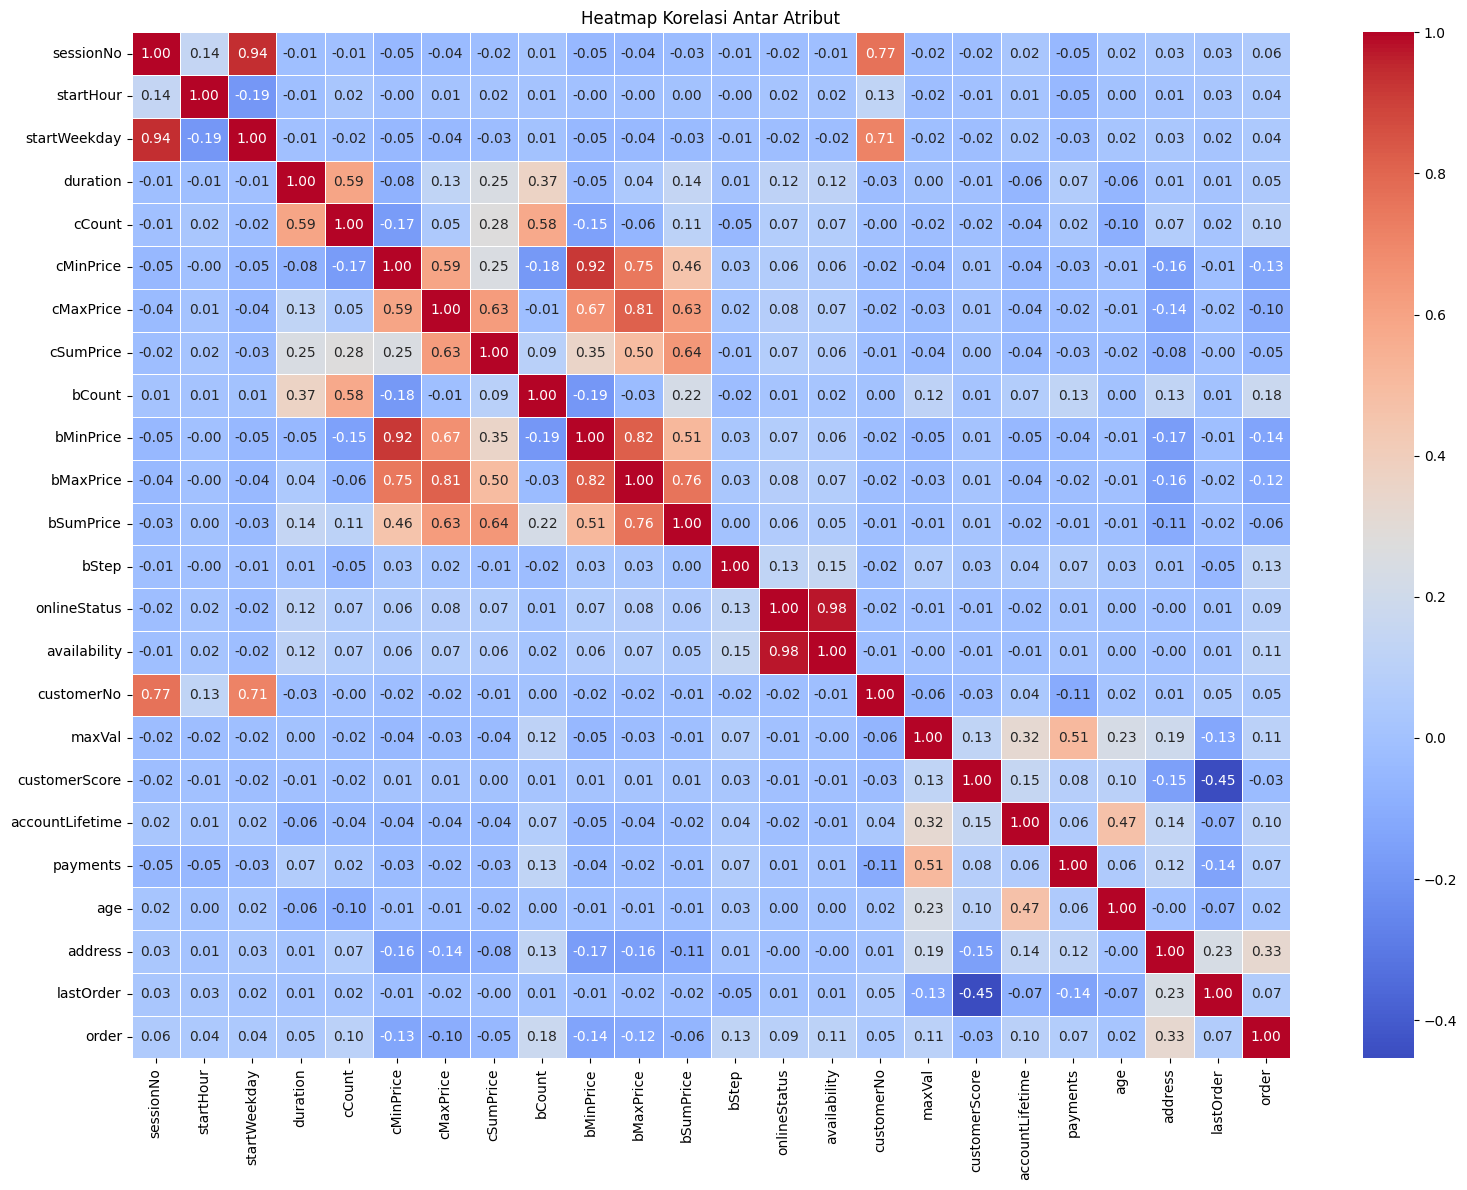

In [5]:
# menampilkan informasi dasar data dan deskripsi statistik
df_transact_train.describe()

# menghitung matriks korelasi
correlation_matrix = df_transact_train.corr()

# menampilkan heatmap dengan ukuran yang lebih besar
plt.figure(figsize=(16, 12))  # Ukuran gambar yang lebih besar
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Atribut')
plt.tight_layout()
plt.show()

In [6]:
# menghapus kolom yang tidak diperlukan
df_transact_train.drop(columns=['cMinPrice', 'cMaxPrice', 'cSumPrice'], inplace=True)

df_transact_train

sessionNo  startHour  startWeekday  duration  cCount  bCount  \
0               1          6             5     0.000       1       1   
1               1          6             5    11.940       1       1   
2               1          6             5    39.887       1       1   
3               2          6             5     0.000       0       0   
4               2          6             5    15.633       0       0   
...           ...        ...           ...       ...     ...     ...   
429008      49998         18             7  5988.882      77       3   
429009      49999         18             7   675.114       6       1   
429010      49999         18             7   715.341       7       1   
429011      50000         18             7     0.000       1       1   
429012      50000         18             7    82.943       1       1   

        bMinPrice  bMaxPrice  bSumPrice  bStep  ...  availability  customerNo  \
0           59.99      59.99      59.99    2.0  ...             0         1.0   
1           59.99      59.99      59.99    2.0  ...             1         1.0   
2           59.99      59.99      59.99    2.0  ...             1         1.0   
3           14.99      39.99      87.97    2.0  ...             1     12045.0   
4           14.99      39.99      87.97    2.0  ...             1     12045.0   
...           ...        ...        ...    ...  ...           ...         ...   
429008      49.95      99.99     209.93    2.0  ...             0     12045.0   
429009      89.99      89.99      89.99    2.0  ...             0     25038.0   
429010      89.99      89.99      89.99    1.0  ...             1     25038.0   
429011       6.99       6.99       6.99    2.0  ...             0        47.0   
429012       6.99       6.99       6.99    2.0  ...             1        47.0   

        maxVal  customerScore  accountLifetime  payments   age  address  \
0        600.0           70.0             21.0       1.0  43.0        1   
1        600.0           70.0             21.0       1.0  43.0        1   
2        600.0           70.0             21.0       1.0  43.0        1   
3       1500.0          520.0            109.0       8.0  45.0        0   
4       1500.0          520.0            109.0       8.0  45.0        0   
...        ...            ...              ...       ...   ...      ...   
429008  1500.0          520.0            109.0       8.0  45.0        0   
429009  1500.0          520.0            109.0       0.0  24.0        1   
429010  1500.0          520.0            109.0       0.0  24.0        1   
429011   300.0          537.0              5.0       0.0  53.0        1   
429012   300.0          537.0              5.0       0.0  53.0        1   

        lastOrder  order  
0            49.0      1  
1            49.0      1  
2            49.0      1  
3            34.0      1  
4            34.0      1  
...           ...    ...  
429008       34.0      0  
429009        4.0      0  
429010        4.0      0  
429011       34.0      0  
429012       34.0      0  

[429013 rows x 21 columns]

Seteleah pre-processing selesai dilakukan, buat model klasifikasi dengan dataset yang sudah disediakan. 

In [9]:
# pisahkan fitur (X) dan target (y)
X = df_transact_train.drop(columns=['order'])  # Ganti 'order' dengan nama kolom target yang tepat jika berbeda
y = df_transact_train['order']

# bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# inisialisasi model Random Forest
model = RandomForestClassifier(n_estimators=10, random_state=42)

# latih model
model.fit(X_train, y_train)

# prediksi pada data pengujian
y_pred = model.predict(X_test)

# evaluasi model
# lakukan evaluasi dengan confusion matrix, classification report, dan accuracy score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[34424  7271]
 [ 4498 82511]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85     41695
           1       0.92      0.95      0.93     87009

    accuracy                           0.91    128704
   macro avg       0.90      0.89      0.89    128704
weighted avg       0.91      0.91      0.91    128704


Accuracy Score: 0.9085576205867727


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a65c79be-89a6-461e-b128-0bc03e0caaaa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>